----
# Laboratorium 2 - Reprezentacja Obrazów
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów wydziału Informatyki i Telekomunikacji Politechniki Poznańskiej 

----
## 0. Zagadnienia do opanowania przed zajęciami
----
### 0.1. Obsługa języka Python oraz bibliotek `numpy`, `matplotlib` oraz `imageio`.
### 0.2. Budowa obrazu 
- rozdzielczość,
- komponenty składowe,
- przechowywanie obrazu w pamięci (rozmiar bitowy próbki, format `.bmp`).  
### 0.3. Informacje o reprezentacjach barwnych `RGB`, `YCbCr` oraz `IHS`.

Literatura:
- M. Domański, Zaawansowane techniki kompresji obrazów i sekwencji wizyjnych, Wydawnictwo  = - - Politechniki Poznańskiej, Poznań 1998
- A. Fiok: Telewizja. Podstawy ogólne, WKiŁ, Warszawa 1996
- W. Pastuszak, Kolor czy barwa, wstęp do grafiki komputerowej, Warszawa, Pako 1993
- W. Skarbek, Metody reprezentacji obrazów cyfrowych, Warszawa, PLJ 1993
- R. Tadeusiewicz, Komputerowa analiza i przetwarzanie obrazów
- Ch. D.Watkins, A. Sadun, S. Marenka, Nowoczesne metody przetwarzania obrazu, WNT 1995
- Wikipedia, Przegląd zagadnień z zakresu teorii koloru
- w języku angielskim: Cornell University Library/Research Department, Digital Imaging Tutorial

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio

----
## 1. Reprezentacja RGB
----
### Zadanie A:  
Wyświetl jeden z obrazów oraz znajdz kształt macierzy, w której jest on przechowywany. Jaki jest typ przechowywanych danych ? 

In [67]:
#print image and stats
im = iio.imread('clown24.bmp') 
im = np.asarray(im) # konwersja na typ macierszy numpy
print(im.shape)
print(im.dtype) # ośmiobitowa liczba całkowita uint8 - tak najczęsciej są wczytywane obrazy



(512, 512, 3)
uint8


### Zadanie B:  
Wyświetl na jednym wykresie (`subplot` lub `subplots`) poszczególne składowe barwne R,G i B (przydatna funkcja: `np.stack`) oraz interpretacje tych składowych w skali szarości (argumenty $cmap$, $vmin$ i $vmax$ funkcji `imshow`). 

#### Dodatkowe : 
Wyświetl obrazy skłądające się z kompozycji tylko dwóch składowych ('R+G', 'R+B' oraz 'G+B')

(512, 512)


<Figure size 720x504 with 0 Axes>

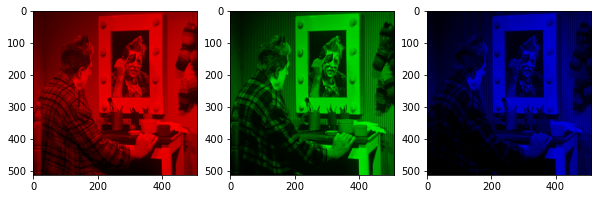

In [98]:
#print image
from numpy import zeros


im = iio.imread('clown24.bmp')
im = np.asarray(im)
red  = im[:,:,0]
green = im[:,:,1]
blue = im[:,:,2]
zero = np.zeros((512, 512), dtype = np.uint8)
print(zero.shape)
fig = plt.figure(figsize=(10, 7))
red_show = np.stack((red, zero, zero), axis=-1)
green_show = np.stack((zero, green, zero), axis=-1) # ważne dać to axis=-1 wtedy ten trzeci wymiar ilość jakby nałożonych na siebie obrazów jest w dobrym miejscu
blue_show = np.stack((zero, zero, blue), axis=-1)
fig = plt.figure(figsize=(10, 7))
#WYŚWIETLANIE
plt.subplot(1,3,1)
plt.imshow(red_show)
plt.subplot(1,3,2)
plt.imshow(green_show) #do CR i Cb dodajemy 128 do każdej wartości żeby to sensownie wysiwtlić
plt.subplot(1,3,3)
plt.imshow(blue_show)








### Zadanie C:  
Wyświetl histogramy dla poszczególnych składowych barwnych.

Podpowiedź : funkcje hist() (argumenty bins i range) oraz ravel()

(array([2.3166e+04, 2.3320e+03, 2.2790e+03, 2.0880e+03, 1.8400e+03,
        1.7000e+03, 1.7330e+03, 1.7880e+03, 1.8760e+03, 1.8680e+03,
        2.0940e+03, 2.2430e+03, 2.1630e+03, 2.4410e+03, 2.4890e+03,
        2.8390e+03, 2.6040e+03, 2.7300e+03, 2.9160e+03, 2.8770e+03,
        2.7220e+03, 2.4610e+03, 2.6470e+03, 2.5390e+03, 2.6230e+03,
        2.5140e+03, 2.4420e+03, 2.5630e+03, 2.2200e+03, 2.3300e+03,
        2.1430e+03, 2.2640e+03, 1.9430e+03, 1.8890e+03, 1.8890e+03,
        1.9390e+03, 1.7980e+03, 1.6310e+03, 1.8520e+03, 1.6160e+03,
        1.6200e+03, 1.5570e+03, 1.6680e+03, 1.6070e+03, 1.4750e+03,
        1.5060e+03, 1.4270e+03, 1.5790e+03, 1.4520e+03, 1.4650e+03,
        1.4760e+03, 1.5540e+03, 1.4320e+03, 1.3200e+03, 1.4950e+03,
        1.4290e+03, 1.4380e+03, 1.4090e+03, 1.4450e+03, 1.4220e+03,
        1.3370e+03, 1.3360e+03, 1.4120e+03, 1.4780e+03, 1.3810e+03,
        1.4280e+03, 1.3350e+03, 1.3650e+03, 1.3640e+03, 1.3030e+03,
        1.3170e+03, 1.2600e+03, 1.3080e+03, 1.22

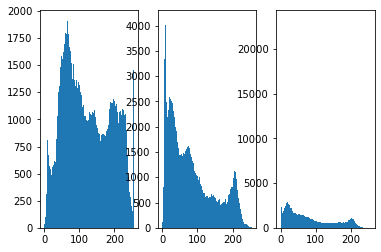

In [97]:
#show histograms
#show images
plt.subplot(1,3,1)
plt.hist(np.ravel(red), 255)
plt.subplot(1,3,2)
plt.hist(np.ravel(green), 255)
plt.subplot(1,3,3)
plt.hist(np.ravel(blue), 255)

### Zadanie Dodatkowe:  
Napisz funkcję pozwalającą na zmianę zakresu bitowego dla poszczególnych zmiennych (od 1 do 8). Wyświetl zmodyfikowane obrazy.

Wskazówka: Jeżeli definiujesz funkcję tak aby modyfikować zakres bitowy niezależnie dla każdej składowej, w celu zachowania jasności obrazu zmień zakres bitowy wyświetlania, lub  przeskaluj wartości zredukowane spowrotem do zakresu wartości (0:255) 


In [70]:
def componentsBitDepthChange(Image,NumBitsR,NumBitsG,NumBitsB):
    return Image

image2 = componentsBitDepthChange(image, 2,1,9)
plt.figure(4, figsize=[16,32], dpi=80)
plt.subplot(1,2,1); plt.imshow(image); plt.title("Original image")
plt.subplot(1,2,2); plt.imshow(image2); plt.title("Converted image")

NameError: name 'image' is not defined

----
## 2. Reprezentacja YCbCr
----
### Zadanie A:  
Napisz funkcję, która konwertuje składowe obrazu z przestrzeni RGB do przestrzeni YCbCr. Użyj następujących wzorów przekształcenia: 
$$ Y  =   0.21260 * R +  0.71520 * G + 0.07220  * B $$ 
$$ Cb = - 0.11457 * R - 0.38543 * G + 0.50000   * B $$
$$ Cr =   0.50000 * R - 0.45415 * G - 0.04585 * B $$
Pamiętaj o typie wyjściowym zmiennych reprezentujących składowe punktu obrazu oraz zakresach wartości poszczególnych składowych (np.stack, np.astype). 

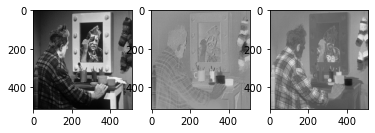

In [93]:
def RGBtoYCbCr(imageRGB):
    red  = imageRGB[:,:,0]
    green = imageRGB[:,:,1]
    blue = imageRGB[:,:,2]
    #Y
    Y_red = 0.2126*red
    Y_green = 0.7152*green
    Y_blue = 0.0722*blue
    Y = Y_red + Y_green + Y_blue
    #Cb
    Cb = -0.11457 * red - 0.38543*green + 0.5 * blue
    #Cr
    Cr = 0.5 * red - 0.45415*green - 0.04585 * blue
    #ostetcznie
    ImageYCbCr = np.stack((Y, Cb, Cr), axis=-1)
    return ImageYCbCr

imageRGB = iio.imread('clown24.bmp')
imageRGB = np.asarray(imageRGB)
ImageYCbCr = RGBtoYCbCr(imageRGB)
plt.subplot(1,3,1)
plt.imshow(ImageYCbCr[:, :, 0], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(ImageYCbCr[:, :, 1] + 128, cmap='gray') #do CR i Cb dodajemy 128 do każdej wartości żeby to sensownie wysiwtlić
plt.subplot(1,3,3)
plt.imshow(ImageYCbCr[:, :, 2] + 128, cmap='gray')



### Zadanie B:  
Wyświetl skłądowe reprezentacji YCbCr w skali szarości oraz histogramy poszczególnych składowych. Porównaj histogramy dla tej reprezentacji z histogramami dla reprezentacji RGB

(array([2.0000e+00, 0.0000e+00, 1.0000e+00, 5.0000e+00, 1.0000e+00,
        9.0000e+00, 2.0000e+01, 3.5000e+01, 6.0000e+01, 2.8000e+01,
        9.4000e+01, 1.2900e+02, 1.0900e+02, 1.2400e+02, 1.3300e+02,
        9.5000e+01, 1.1100e+02, 7.4000e+01, 2.3000e+01, 5.1000e+01,
        4.6000e+01, 4.3000e+01, 2.4000e+01, 2.1000e+01, 3.9000e+01,
        3.1000e+01, 2.5000e+01, 4.9000e+01, 4.1000e+01, 5.4000e+01,
        1.0100e+02, 1.0200e+02, 1.1600e+02, 2.6500e+02, 2.1400e+02,
        1.9400e+02, 4.0400e+02, 7.1100e+02, 1.0580e+03, 2.0210e+03,
        3.6100e+03, 2.7270e+03, 5.4350e+03, 3.1650e+03, 4.3060e+03,
        7.3750e+03, 8.4290e+03, 7.5390e+03, 8.2750e+03, 6.5010e+03,
        1.2262e+04, 9.9230e+03, 6.7990e+03, 6.9610e+03, 8.3870e+03,
        6.2280e+03, 5.7310e+03, 4.0740e+03, 3.3560e+03, 7.5680e+03,
        5.8100e+03, 4.6280e+03, 6.4870e+03, 6.2460e+03, 6.0550e+03,
        7.4150e+03, 4.0810e+03, 6.9280e+03, 7.6020e+03, 3.3280e+03,
        4.5690e+03, 3.0000e+03, 5.2030e+03, 4.11

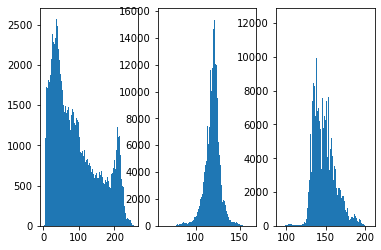

In [95]:
#show images
plt.subplot(1,3,1)
plt.hist(np.ravel(ImageYCbCr[:, :, 0]), 255)
plt.subplot(1,3,2)
plt.hist(np.ravel(ImageYCbCr[:, :, 1] + 128), 127)
plt.subplot(1,3,3)
plt.hist(np.ravel(ImageYCbCr[:, :, 2]+128), 127)

----
## 2. Reprezentacja IHS (HSL)
----
### Zadanie Dodatkowe:  
Napisz funkcję pozwalającą na konwersję obrazu w reprezentacji RGB do reprezentacji IHS.  
Przy konwersji składowe RGB muszą być wartościami w zakresie (0,1)
Wzory:  

$\begin{align*} 
 I=R+G+B \\ 
 H &= \begin{cases} 
      (G−B)/(I−3B) & \text{if: } B= min (R, G, B) \\
      (B−R)/(I−3R) & \text{if: } G= min (R, G, B) \\ 
      (R−G)/(I−3G) & \text{if: } R= min (R, G, B) \\
 \end{cases} \\
 S &= \begin{cases}
      (I−3B)/I0 & \text{if: } \leq H \leq 1 \\
      (I−3R)/I1 & \text{if: } 1 < H \leq 2 \\
      (I−3G)/I2 & \text{if: } 2 < H \leq 3 \\
 \end{cases}
\end{align*}$


In [ ]:
def RGBtoIHSConversion(ImageRGB):
   #peereform conversion
   return ImageIHS